# Task 1: Working with a dataset with categorical features

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Mount drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import os
# os.chdir("/content/drive/")
# !ls

### Step 1. Reading the data

In [4]:
# Read the CSV file into 2 different dataframe
train_data = pd.read_csv('adult_train.csv')

Xtrain = train_data.drop('target', axis=1)
Xtrain_dicts = Xtrain.to_dict('records') #convert Xtrain to a dictionary
Ytrain = train_data['target']

test_data = pd.read_csv('adult_test.csv')

Xtest = test_data.drop('target', axis=1)
Xtest_dicts = Xtest.to_dict('records') #convert Xtest to a dictionary
Ytest = test_data['target']

In [5]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


We inspect the first instance of the data after we converted it to a set of dictionaries.

In [6]:
Xtrain_dicts[0]

{'age': 27,
 'workclass': 'Private',
 'education': 'Some-college',
 'education-num': 10,
 'marital-status': 'Divorced',
 'occupation': 'Adm-clerical',
 'relationship': 'Unmarried',
 'race': 'White',
 'sex': 'Female',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 44,
 'native-country': 'United-States'}

We can see that each instance represents the information about an individual that we should use in training the model along with this individual's salary category, we also inspect this instance's respective target value which is the salary category.

In [7]:
Ytrain[0]

'<=50K'

In [8]:
Ytrain.unique()

array(['<=50K', '>50K'], dtype=object)

As shown above, the the individual belongs to the category of people earning less than or equal 50k dollars per year, while there are 2 classes, <=50k and >50K.

### Step 2: Encoding the features as numbers.

In [9]:
dv = DictVectorizer()
Xtrain_encoded = dv.fit_transform(Xtrain_dicts)
Xtest_encoded = dv.transform(Xtest_dicts)

We use the DictVectorizer() method to vectorize the data which we stored in dictionaries, then we used <b>fit_transform</b> to encode the Xtrain (training data). In this method, <i>fit</i> goes over the training data and builds a vocabulary of features then <i>transform</i> the data from a list of dictionaries into a numerical matrix.

Because the vectorizer does not need to be "trained" this time, we simply called <b>transform</b> to handle the test data by converting it from a list of dictionaries into a numerical matrix.

In [10]:
Xtest_encoded.toarray()

array([[  25.,    0.,    0., ...,    0.,    0.,    0.],
       [  38.,    0.,    0., ...,    0.,    0.,    0.],
       [  28.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [  38.,    0.,    0., ...,    0.,    0.,    0.],
       [  44., 5455.,    0., ...,    0.,    0.,    0.],
       [  35.,    0.,    0., ...,    0.,    0.,    0.]])

In [11]:
Xtrain_encoded.toarray()

array([[  27.,    0.,    0., ...,    0.,    0.,    0.],
       [  27.,    0.,    0., ...,    0.,    0.,    0.],
       [  25.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [  23.,    0.,    0., ...,    0.,    0.,    0.],
       [  45., 7688.,    0., ...,    0.,    0.,    0.],
       [  25., 2597.,    0., ...,    0.,    0.,    0.]])

In [12]:
#Display first 10 features
dv.get_feature_names()[:10]

['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'education=10th',
 'education=11th',
 'education=12th',
 'education=1st-4th',
 'education=5th-6th',
 'education=7th-8th']

In [13]:
#Display last 10 features
dv.get_feature_names()[-10:]

['sex=Male',
 'workclass=?',
 'workclass=Federal-gov',
 'workclass=Local-gov',
 'workclass=Never-worked',
 'workclass=Private',
 'workclass=Self-emp-inc',
 'workclass=Self-emp-not-inc',
 'workclass=State-gov',
 'workclass=Without-pay']

Moreover, we apply the three classifiers Decision Tree, Random Forest, and Gradient Boosting on the training data and examine their mean cross-validation accuracies.

In [14]:
# Cross-validation accuracy of Decision Tree Classifier
skDT = DecisionTreeClassifier(random_state=0)
cross_val_score(skDT, Xtrain_encoded, Ytrain).mean()

0.8179724514305352

In [15]:
# Cross-validation accuracy of Random Forest Classifier
RF = RandomForestClassifier(random_state=0,n_jobs=-1)
cross_val_score(RF, Xtrain_encoded, Ytrain).mean()

0.8467491260155932

In [16]:
# Cross-validation accuracy of Gradient Boosting Classifier
GBC = GradientBoostingClassifier(random_state=0)
cross_val_score(GBC, Xtrain_encoded, Ytrain).mean()

0.8656675592304335

We can see from the three cells above that the GradientBoostingClassifier had the highest mean cross-validation accuracy among the 3 examined classifiers, so we use it to predict the data of the test set.

In [17]:
GBC.fit(Xtrain_encoded, Ytrain)

GradientBoostingClassifier(random_state=0)

In [18]:
accuracy_score(Ytest, GBC.predict(Xtest_encoded))

0.8711381364781033

We can see that the model achieved a higher test set accuracy than its mean cross-validation accuracy by <b>0.5%</b> where it achieved <b>87.1%</b> accuracy on the test set and <b>86.5%</b> mean accuracy on the cross-validated sets.

### Step 3. Combining the steps.

In [19]:
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier(random_state=0)
)

In [20]:
cross_val_score(pipeline, Xtrain_dicts, Ytrain, n_jobs=-1).mean()

0.8656675592304335

In [21]:
pipeline.fit(Xtrain_dicts,Ytrain)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=0))])

In [22]:
accuracy_score(Ytest,pipeline.predict(Xtest_dicts))

0.8711381364781033

After building the pipeline to vectorize the data from the list of dictionaries, and use it for cross-validation, fitting on the training set, and testing on the testing set, we got the exact same results when implementing the pipeline with DictVectorizer method and the GBC model as the direct implementation of the Gradient Boosting Classifier.

### Hyperparameter tuning of the GBC using sklearn's gridSearch

In [23]:
# Build a pipeline consisting of a vectorization step and a decision tree classifier
pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier(random_state=0)
)

In [24]:
# Tuning Gradien boosting classifier
param_grid = [{'gradientboostingclassifier__criterion': ['friedman_mse', 'mse'],
                'gradientboostingclassifier__n_estimators' : [4, 8, 16, 64, 100]
                ,'gradientboostingclassifier__learning_rate': [0.001,0.01]
                  }]
gs = GridSearchCV(pipeline, param_grid,n_jobs=-1)

In [25]:
gs.fit(Xtrain_dicts, Ytrain)

GridSearchCV(estimator=Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'gradientboostingclassifier__criterion': ['friedman_mse',
                                                                    'mse'],
                          'gradientboostingclassifier__learning_rate': [0.001,
                                                                        0.01],
                          'gradientboostingclassifier__n_estimators': [4, 8, 16,
                                                                       64,
                                                                       100]}])

In [26]:
print("The hyperparameter tuned Gradient Boosting Classifier accuracy is: "+str(round(gs.best_score_,2)))

The hyperparameter tuned Gradient Boosting Classifier accuracy is: 0.84


In [27]:
print("The hyperparameter tuned Gradient Boosting Classifier parameters are: \n")
for i,k in zip(gs.best_params_.keys(),gs.best_params_.values()):
    print(i[28:]+': '+str(k))

The hyperparameter tuned Gradient Boosting Classifier parameters are: 

criterion: friedman_mse
learning_rate: 0.01
n_estimators: 100


In [28]:
accuracy_score(Ytest, gs.predict(Xtest_dicts))

0.8473680977826915

we can see from the tuned Gradient Boosting Classifier model and its other version applied with model's default values that the two versions of the model, the direct implementation of the model on the dictVectorized data, and the model implemented with a dict vectorizer within a pipeline, performed with the same efficiency, while the model had a higher test accuracy when implemented with its default parameters, thefore for future works we should consider expanding the grid search space to maximize the model's test-accuracy while maintaining a narrow generalization gap. 

# Task 2: Decision trees and random forests

In [29]:
def testTrain_plot(max_depths,train_results,test_results, title):
    plt.figure(figsize=(15,6))
    line1, = plt.plot(max_depths,train_results, 'b', label="Train accuracy",
             marker='o')
    line2, = plt.plot(max_depths,test_results, 'r', label="Test accuracy",
             marker='o')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Tree depth')
    plt.show()

Here we define a function that takes as parameters the array of depths we want to examine ([1,50] in all the examined cases), predictions of training and testing sets separately, and a title, and produces a graph from these inputs which is going to be used in over/underfitting examination of the to be implemented models.

## Underfitting and overfitting in decision tree classifiers

In [30]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    dt.fit(Xtrain_encoded, Ytrain)
    YpredTrain = dt.predict(Xtrain_encoded)
    trainAccuracy = accuracy_score(Ytrain, YpredTrain)
    Ypredtest = dt.predict(Xtest_encoded)
    testAccuracy = accuracy_score(Ytest, Ypredtest)
    train_results.append(trainAccuracy)
    test_results.append(testAccuracy)

In [31]:
print('Training accuracy at max_depth = 50: ' + str(round(train_results[-1]*100,2))+'%')
print('Testing accuracy at max_depth = 50: ' + str(round(test_results[-1]*100,2))+'%')

Training accuracy at max_depth = 50: 97.64%
Testing accuracy at max_depth = 50: 81.75%


as we see from the cell above, after the decision tree classifier is trained on with the Tree depth hyperparameter vale equal to <b>50</b>, we can see that the training accuracy at Tree depth = 50 is <b>97.64%</b> and the testing accuracy at the same tree depth is equal to <b>81.75%</b>, which is a very strong indictor on the existance of a generalization gap between the training and testing accuracies curves of the model. 

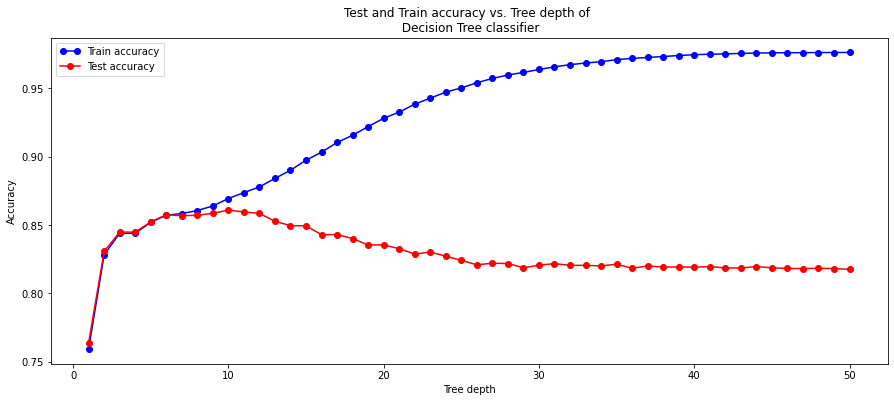

In [32]:
testTrain_plot(max_depths,train_results,test_results, "Test and Train accuracy vs. Tree depth of \n Decision Tree classifier")

As we can see in the plot above as the tree depth hyperparameter of the decision tree classifier passes the value 7, the model starts to overfit where it reaches a training accuracy of 97.6% with a respective testing accuracy at max_depth = 50 of 81.7%, while between tree depths 1 and 2, the model was underfitting, meaning that it was too simple that it can't predict the training and testing data with a good accuracy (train accuracy equal test accuracy which are between 75% and 83%). Therefore, we can conclude that the optimal max_depth that maximizes the accuracy and minimizes the generalization gap between the testing and training accuracies curves is when the max_depth hyperparameter is between 6 and 10.

## Underfitting and overfitting in random forest classifiers

### For n_estimators = 1

In [33]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf_e1 = RandomForestClassifier(max_depth=max_depth,n_estimators=1,random_state=0)
    rf_e1.fit(Xtrain_encoded, Ytrain)
    YpredTrain = rf_e1.predict(Xtrain_encoded)
    trainAccuracy = accuracy_score(Ytrain, YpredTrain)
    Ypredtest = rf_e1.predict(Xtest_encoded)
    testAccuracy = accuracy_score(Ytest, Ypredtest)
    train_results.append(trainAccuracy)
    test_results.append(testAccuracy)

In [34]:
print('Training accuracy at max_depth = 50: ' + str(round(train_results[-1]*100,2))+'%')
print('Testing accuracy at max_depth = 50: ' + str(round(test_results[-1]*100,2))+'%')

Training accuracy at max_depth = 50: 91.61%
Testing accuracy at max_depth = 50: 80.87%


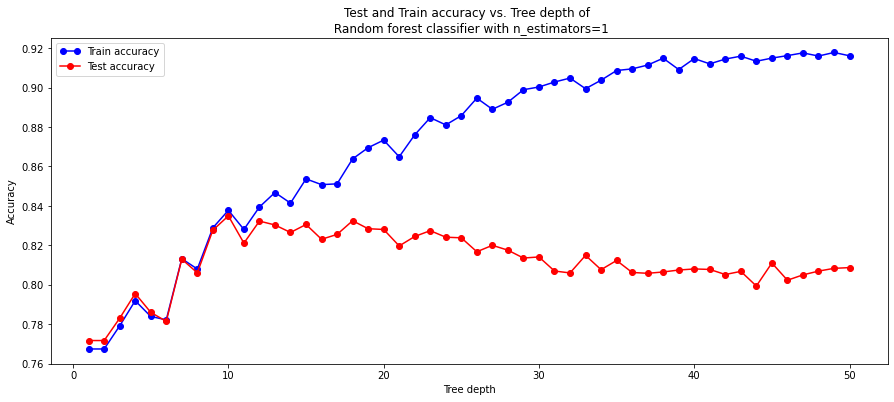

In [35]:
testTrain_plot(max_depths,train_results,test_results, "Test and Train accuracy vs. Tree depth of \n Random forest classifier with n_estimators=1")

As we can see from the figure above, when applying the random forest classifier with the hyperparameter n_estimators (number of decision trees used in ensemble) equal to <b>1</b>, we can the see that the model was underfitting between the Tree depth hyperparameter equal to <b>1</b> and <b>8</b>, and it reaches its optimal Tree depth value that maximizes the test accuracy and minimizes the generalization gap between the training and testing accuracies curves at max_depth equal to <b>10</b>, where after this value the generalization gap starts getting larger and larger till it reaches to <b>11%</b> between the testing and training accuracies at max_depth value equal to <b>50</b> where the training and testing accuracies are equal to <b>91.61%</b> and <b>80.87%</b> respectively.

### For n_estimators = 50

In [36]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf_e50 = RandomForestClassifier(max_depth=max_depth,n_estimators=50,random_state=0, n_jobs=-1)
    rf_e50.fit(Xtrain_encoded, Ytrain)
    YpredTrain = rf_e50.predict(Xtrain_encoded)
    trainAccuracy = accuracy_score(Ytrain, YpredTrain)
    Ypredtest = rf_e50.predict(Xtest_encoded)
    testAccuracy = accuracy_score(Ytest, Ypredtest)
    train_results.append(trainAccuracy)
    test_results.append(testAccuracy)

In [37]:
print('Training accuracy at max_depth = 50: ' + str(round(train_results[-1]*100,2))+'%')
print('Testing accuracy at max_depth = 50: ' + str(round(test_results[-1]*100,2))+'%')

Training accuracy at max_depth = 50: 97.6%
Testing accuracy at max_depth = 50: 84.38%


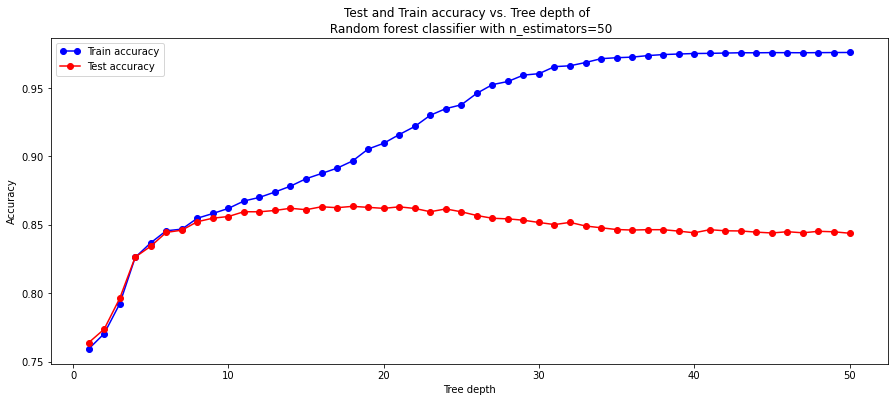

In [38]:
testTrain_plot(max_depths,train_results,test_results, "Test and Train accuracy vs. Tree depth of \n Random forest classifier with n_estimators=50")

From the figure above, we can see a similar behaviour as the graph of the Random Forest classifier with n_estimators set to <b>1</b>, but this time after increasing the number of decision trees used in ensemble (n_estimators) to 50, the training accuracy increased by 6% and the testing accuracy increased by approximately 4% resulting in an increase in the generalization gap to <b>13%</b> at max_depth = 50 where the training accuracy is equal <b>97.6%</b> and testing accuracy to <b>84.4%</b>, while the model maintained the same underfitting behaviour for max_depth value less than 4.

### For n_estimators = 100

In [39]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf_e100 = RandomForestClassifier(max_depth=max_depth,n_estimators=100,random_state=0, n_jobs=-1)
    rf_e100.fit(Xtrain_encoded, Ytrain)
    YpredTrain = rf_e100.predict(Xtrain_encoded)
    trainAccuracy = accuracy_score(Ytrain, YpredTrain)
    Ypredtest = rf_e100.predict(Xtest_encoded)
    testAccuracy = accuracy_score(Ytest, Ypredtest)
    train_results.append(trainAccuracy)
    test_results.append(testAccuracy)

In [40]:
print('Training accuracy at max_depth = 50: ' + str(round(train_results[-1]*100,2))+'%')
print('Testing accuracy at max_depth = 50: ' + str(round(test_results[-1]*100,2))+'%')

Training accuracy at max_depth = 50: 97.64%
Testing accuracy at max_depth = 50: 84.59%


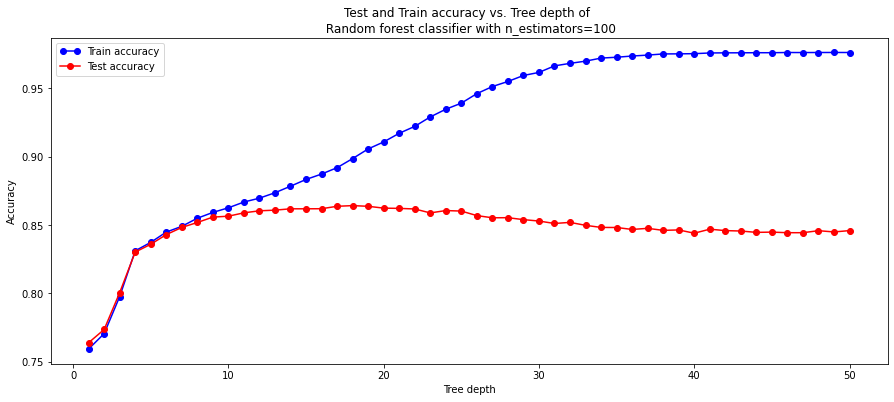

In [41]:
testTrain_plot(max_depths,train_results,test_results, "Test and Train accuracy vs. Tree depth of \n Random forest classifier with n_estimators=100")

From the figure above, we can see that when the n_estimators hyperparameters was set to <b>100</b>, the model performed almost typically to its performance when the n_estimators hyperparameter was set to <b>50</b>, which means that the models train and test accuracy curves began to converge, and any futher increase in the n_estimators hyperparameter value will not affect the model's training and testing accuracies much as by doubling the n_estimators values from 50 to 100, the model maintained approximately the same behaviour and accuracy values of the training and testing accuracies curves over the different max_depths.

### For n_estimators = 300

In [42]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rf_e300 = RandomForestClassifier(max_depth=max_depth,n_estimators=300,random_state=0, n_jobs=-1)
    rf_e300.fit(Xtrain_encoded, Ytrain)
    YpredTrain = rf_e300.predict(Xtrain_encoded)
    trainAccuracy = accuracy_score(Ytrain, YpredTrain)
    Ypredtest = rf_e300.predict(Xtest_encoded)
    testAccuracy = accuracy_score(Ytest, Ypredtest)
    train_results.append(trainAccuracy)
    test_results.append(testAccuracy)

In [43]:
print('Training accuracy at max_depth = 50: ' + str(round(train_results[-1]*100,2))+'%')
print('Testing accuracy at max_depth = 50: ' + str(round(test_results[-1]*100,2))+'%')

Training accuracy at max_depth = 50: 97.64%
Testing accuracy at max_depth = 50: 84.56%


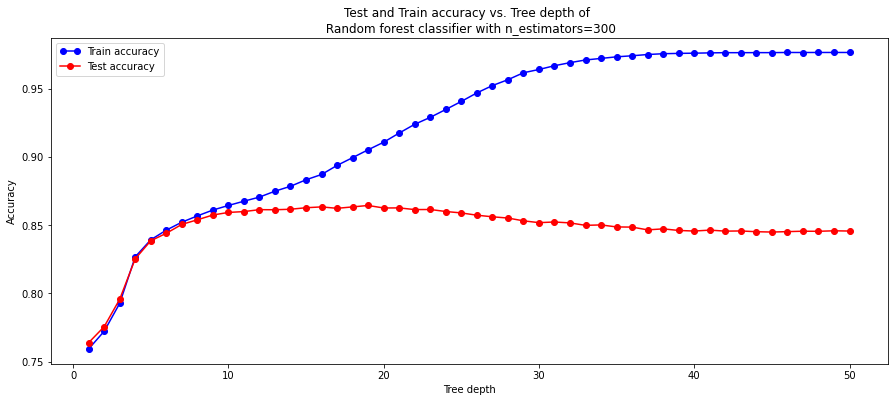

In [44]:
testTrain_plot(max_depths,train_results,test_results, "Test and Train accuracy vs. Tree depth of \n Random forest classifier with n_estimators=300")

From the figure above, we can see that our assumption for the Random Forest classifier accuracies convergence by the increase of the values of the hyperparameter n_estimators is true, as after triplling the n_estimators value of the previous model and setting it to 300, the model maintained the same behaviour on the test and train accuracies graphs as the previous 2 models, but the time the curves are getting smoother as a result of the high number of decision tree ensembles which reduces the error when calculating the mean accuracy at each tree depth accross the large number of estimators.

## To sum up:

- <b>What's the difference between the curve for a decision tree and for a random forest with an
ensemble size of 1, and why do we see this difference?</b>
> The difference between the decision tree and random forest curves is that the decision tree is built on the whole dataset with all its observations and features, while the random forest with an
ensemble size of 1 randomly selects subsets of observations and features to build a decision tree using them, therefore we can see an inconsistency in the max_depth graph of the random forest train and test curves, due to the different subsets of variables and features selected at each tree depth.
- <b>What happens with the curve for random forests as the ensemble size grows?</b>
> As discussed earlier, as the nuber of the ensemble size grows, the train and test accuracies converges to a specific value, in our case approximately <b>97.5%</b> and <b>84.5%</b> for the training and testing accuracies respectively, and we can see that the higher the ensemble size gets, the smoother the curves get, due to the fact that random forest randomly selects observations and features to build the <b>n</b> decision trees from and then averages the resulting accuracies, so as n tends to infinity, the accuracy at each tree depth will tend to the mean resulting in a smooth curve for each of the training and testing sets.
- <b>What happens with the best observed test set accuracy as the ensemble size grows?</b>
> In our case, the best observed test set accuracy was at tree depth set to <b>10</b> when the ensemble size was equal to <b>1</b>, and as the ensemble size increased, the tree depth that maximized the test accuracy remained approximately the same.
- <b>What happens with the training time as the ensemble size grows?</b>
> As the ensemble size increases, the training time becomes much longer, as the number of trees to be built at each variant of the model was increased by a lot, starting with ensemble size equal to 1, moving by ensemble size equal to 50 and 100 till the maximum implemented ensemble size which was 300, it resulted in a more computationally expensive model.

# Task 3: Feature importances in random forest classifiers

### Desicion Tree

In [45]:
skDT.fit(Xtrain_encoded, Ytrain)

DecisionTreeClassifier(random_state=0)

In [46]:
feature_names = dv.feature_names_

In [47]:
DTimp = []
for weight, fname in sorted(zip(skDT.feature_importances_, dv.feature_names_), reverse=True):
    DTimp.append((fname,weight))

In [48]:
print('Top 10 important features fof the Decision Tree Classifier:')
for i in DTimp[:10]:
    print(i[0]+':',round(i[1],3))

Top 10 important features fof the Decision Tree Classifier:
marital-status=Married-civ-spouse: 0.214
age: 0.163
education-num: 0.127
capital-gain: 0.119
hours-per-week: 0.101
capital-loss: 0.044
workclass=Private: 0.014
workclass=Self-emp-not-inc: 0.011
occupation=Exec-managerial: 0.01
occupation=Prof-specialty: 0.009


In [49]:
print('Least 10 important features fof the Decision Tree Classifier:')
for i in DTimp[-10:]:
    print(i[0]+':',round(i[1],3))

Least 10 important features fof the Decision Tree Classifier:
occupation=Priv-house-serv: 0.0
occupation=Armed-Forces: 0.0
native-country=Scotland: 0.0
native-country=Peru: 0.0
native-country=Outlying-US(Guam-USVI-etc): 0.0
native-country=Nicaragua: 0.0
native-country=Honduras: 0.0
native-country=Holand-Netherlands: 0.0
native-country=El-Salvador: 0.0
native-country=Dominican-Republic: 0.0


As we can see from the two cells above, sklearn's default feature importance mechanism found that for the decision tree implemented above,  the feature's maritial status class of (Married-civ-spouse) was the most important feature in the discrimination between the 2 output classes  with an importance coefficient of 0.214 followed by the age feature which was assigned an importance coefficient of 0.163, while it found that the feature native-country with most of its classes had not any importance in the discrimination between the 2 output classes which is an indication that there is no-race/origin disrimination in the determination criteria of the salaries.

### Random Forests

In [50]:
RF.fit(Xtrain_encoded, Ytrain)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [51]:
RFimp=[]
for weight, fname in sorted(zip(RF.feature_importances_, dv.feature_names_), reverse=True):
    RFimp.append((fname, weight))

In [52]:
print('Top 10 important features fof the Random Forest Classifier:')
for i in RFimp[:10]:
    print(i[0]+':',round(i[1],3))

Top 10 important features fof the Random Forest Classifier:
age: 0.226
hours-per-week: 0.114
capital-gain: 0.103
education-num: 0.067
marital-status=Married-civ-spouse: 0.06
relationship=Husband: 0.05
capital-loss: 0.034
marital-status=Never-married: 0.027
occupation=Exec-managerial: 0.02
occupation=Prof-specialty: 0.016


In [53]:
print('Least 10 important features fof the Random Forest Classifier:')
for i in RFimp[-10:]:
    print(i[0]+':',round(i[1],3))

Least 10 important features fof the Random Forest Classifier:
native-country=Trinadad&Tobago: 0.0
native-country=Scotland: 0.0
workclass=Without-pay: 0.0
native-country=Thailand: 0.0
education=Preschool: 0.0
native-country=Outlying-US(Guam-USVI-etc): 0.0
occupation=Armed-Forces: 0.0
workclass=Never-worked: 0.0
native-country=Honduras: 0.0
native-country=Holand-Netherlands: 0.0


As we can see from the two cells above, sklearn's default feature importance mechanism found that for the Random Forest Classifier implemented above, the feature age was the most important feature in the discrimination between the 2 output classes with an importance coefficient of 0.226 followed by the hours-per-week feature which was assigned an importance coefficient of 0.114, while we we found that features like native-country with most of its classes, and workclass (classes Without-pay and Never-worked) had not any importance in the discrimination between the 2 output classes.

### Discussion of alternative ways to compute importance scores of individual features

From the article <i>Beware Default Random Forest Importances</i> of Terence Parr, Kerem Turgutlu, Christopher Csiszar, and Jeremy Howard, they discussed several alternative methods to compute the importance of features in Random Forest models. They started by discussing the default feature importance mechanism of sklearn's random forest model <b> the mean
decrease in impurity</b> and how it does not always give an accurate picture of importance as it tends to inflate the importance of continuous or high cardinality categorical variables.<br>
Moreover, they proceeded to discuss alternative methods for measuring the importance scores of features such as <b>permutation importance </b> and <b>drop-column importance</b>. They started to explain Permutation importance mechanism which works in the following way: 
<ul>
    <li>Records a baseline accuracy by passing a validation set through the model.</li>
    <li>Permute the values of a single feature and then pass all test samples back through the model and recompute the accuracy.</li>
    <li>Calculates the importance of the feature as the difference between the baseline and the drop in overall accuracy</li>
</ul>
Moreover, they discussed about the permutation importance technique drawbacks which is its comutational expense as it takes much more time compared to the mean decrease in impurity mechanism, and it over-estimates the importance of correlated predictor variables, but it does not require the retraining of the underlying model in
order to measure the effect of shuffling variables on overall model accuracy, and its results are more reliable than the default importance computation mechanism. Afterwards, they moved forward to discuss about the drop-column importance mechanism which works in the following way: 
<ul>
    <li>Getting a baseline performance score.</li>
    <li>Dropping a column entirely, retraining the model, and recomputing the performance score.</li>
    <li>Calculating The importance value of a feature as the difference between the baseline score and the score
from the model missing the dropped feature.</li>
</ul>
Then, they stress on the fact of how this mechanism answers the question of how important a feature is to overall model performance, which is the key point of the interpretability of the model, while this mechanism's drawback is extremely computationally expensive, and if it wasn't that expensive, it could have benn the default for all random forest models.